# Assignment 3 - Building a Custom Visualization

In this assignment you must choose __one__ of the options presented below and submit a visual as well as your source code for peer grading. The details of how you solve the assignment are up to you, although your assignment must use matplotlib so that your peers can evaluate your work. The options differ in challenge level, but there are no grades associated with the challenge level you chose. However, your peers will be asked to ensure you at least met a minimum quality for a given technique in order to pass. Implement the technique fully (or exceed it!) and you should be able to earn full grades for the assignment.

Ferreira, N., Fisher, D., & Konig, A. C. (2014, April). [Sample-oriented task-driven visualizations: allowing users to make better, more confident decisions.](https://www.microsoft.com/en-us/research/wp-content/uploads/2016/02/Ferreira_Fisher_Sample_Oriented_Tasks.pdf) 
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;In Proceedings of the SIGCHI Conference on Human Factors in Computing Systems (pp. 571-580). ACM. ([video](https://www.youtube.com/watch?v=BI7GAs-va-Q))

In this [paper](https://www.microsoft.com/en-us/research/wp-content/uploads/2016/02/Ferreira_Fisher_Sample_Oriented_Tasks.pdf) the authors describe the challenges users face when trying to make judgements about probabilistic data generated through samples. As an example, they look at a bar chart of four years of data (replicated below in Figure 1). Each year has a y-axis value, which is derived from a sample of a larger dataset. For instance, the first value might be the number votes in a given district or riding for 1992, with the average being around 33,000. On top of this is plotted the 95% confidence interval for the mean (see the boxplot lectures for more information, and the yerr parameter of barcharts).

<br>
<img src="assets/Assignment3Fig1.png" alt="Figure 1" style="width: 400px;"/>
<h4 style="text-align: center;" markdown="1">  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Figure 1 from (Ferreira et al, 2014).</h4>

<br>

A challenge that users face is that, for a given y-axis value (e.g. 42,000), it is difficult to know which x-axis values are most likely to be representative, because the confidence levels overlap and their distributions are different (the lengths of the confidence interval bars are unequal). One of the solutions the authors propose for this problem (Figure 2c) is to allow users to indicate the y-axis value of interest (e.g. 42,000) and then draw a horizontal line and color bars based on this value. So bars might be colored red if they are definitely above this value (given the confidence interval), blue if they are definitely below this value, or white if they contain this value.


<br>
<img src="assets/Assignment3Fig2c.png" alt="Figure 1" style="width: 400px;"/>
<h4 style="text-align: center;" markdown="1">  Figure 2c from (Ferreira et al. 2014). Note that the colorbar legend at the bottom as well as the arrows are not required in the assignment descriptions below.</h4>

<br>
<br>

**Easiest option:** Implement the bar coloring as described above - a color scale with at least three colors, (e.g. blue, white, and red). Assume the user provides the y axis value of interest as a parameter or variable.

**Harder option:** Implement the bar coloring as described in the paper, where the color of the bar is actually based on the amount of data covered (e.g. a gradient ranging from dark blue for the distribution being certainly below this y-axis, to white if the value is certainly contained, to dark red if the value is certainly not contained as the distribution is above the axis).

**Even Harder option:** Add interactivity to the above, which allows the user to click on the y axis to set the value of interest. The bar colors should change with respect to what value the user has selected.

**Hardest option:** Allow the user to interactively set a range of y values they are interested in, and recolor based on this (e.g. a y-axis band, see the paper for more details).

---

*Note: The data given for this assignment is not the same as the data used in the article and as a result the visualizations may look a little different.*

In [1]:
# Use the following data for this assignment:

import pandas as pd
import numpy as np

np.random.seed(12345)

df = pd.DataFrame([np.random.normal(32000,200000,3650), 
                   np.random.normal(43000,100000,3650), 
                   np.random.normal(43500,140000,3650), 
                   np.random.normal(48000,70000,3650)], 
                  index=[1992,1993,1994,1995])
df

,0,1,2,3,4,5,6,7,8,9,...,3640,3641,3642,3643,3644,3645,3646,3647,3648,3649
1992,-8941.531897,127788.667612,-71887.743011,-79146.060869,425156.114501,310681.166595,50581.575349,88349.230566,185804.513522,281286.947277,...,171938.760289,150650.759924,203663.976475,-377877.158072,-197214.093861,24185.008589,-56826.729535,-67319.766489,113377.299342,-4494.878538
1993,-51896.094813,198350.518755,-123518.252821,-129916.759685,216119.147314,49845.883728,149135.648505,62807.672113,23365.577348,-109686.264981,...,-44566.520071,101032.122475,117648.199945,160475.622607,-13759.888342,-37333.493572,103019.841174,179746.127403,13455.493990,34442.898855
1994,152336.932066,192947.128056,389950.263156,-93006.152024,100818.575896,5529.230706,-32989.370488,223942.967178,-66721.580898,47826.269111,...,165085.806360,74735.174090,107329.726875,199250.734156,-36792.202754,-71861.846997,26375.113219,-29328.078384,65858.761714,-91542.001049
1995,-69708.439062,-13289.977022,-30178.390991,55052.181256,152883.621657,12930.835194,63700.461932,64148.489835,-29316.268556,59645.677367,...,-13901.388118,50173.686673,53965.990717,4128.990173,72202.595138,39937.199964,139472.114293,59386.186379,73362.229590,28705.082908


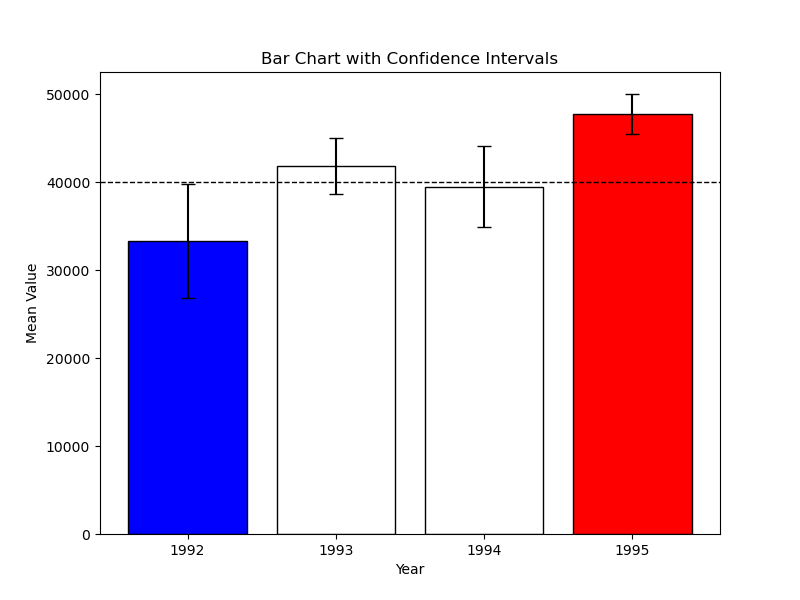

In [24]:
#Your Code Here 

# Easiest Option

import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Calculate the mean and 95% confidence interval
means = df.mean(axis=1)
errors = df.std(axis=1) / np.sqrt(df.shape[1]) * 1.96  # 95% confidence interval

# User-defined threshold value
y_value = 40000

# Define bar colors based on the threshold
colors = ['blue' if mean + err < y_value else 
          'red' if mean - err > y_value else 'white' 
          for mean, err in zip(means, errors)]

# Create the bar plot with black edges
fig, ax = plt.subplots(figsize=(8, 6))
bars = ax.bar(df.index, means, yerr=errors, color=colors, edgecolor='black', capsize=5)

# Add horizontal line for the threshold value
ax.axhline(y=y_value, color='black', linestyle='--', linewidth=1)

# Set labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Mean Value')
ax.set_title('Bar Chart with Confidence Intervals')

# Ensure only the years are shown as x-axis ticks
ax.set_xticks(df.index)  # Set tick positions to the index values
ax.set_xticklabels(df.index)  # Set the tick labels to the year values

# Display the plot
plt.show()


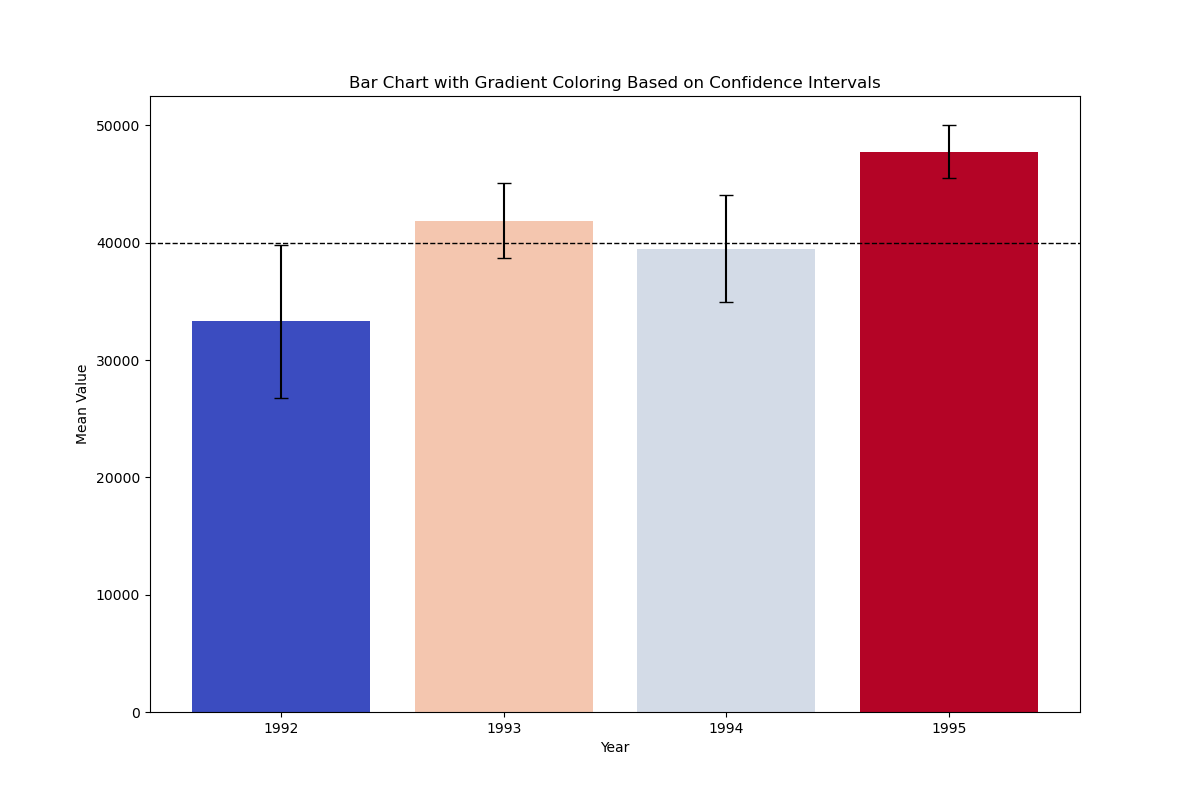

In [25]:
# Harder option

from matplotlib.colors import Normalize, TwoSlopeNorm
import matplotlib.cm as cm

# Define a colormap and normalization function
norm = TwoSlopeNorm(vmin=means.min(), vcenter=y_value, vmax=means.max())
cmap = cm.get_cmap('coolwarm')

# Create the bar plot with gradient colors
fig, ax = plt.subplots(figsize=(12, 8))
bars = ax.bar(df.index, means, yerr=errors, 
              color=[cmap(norm(mean)) for mean in means], capsize=5)

# Add horizontal line for the threshold value
ax.axhline(y=y_value, color='black', linestyle='--', linewidth=1)

# Ensure only the years are shown as x-axis ticks
ax.set_xticks(df.index)  # Set the x-tick positions to match the DataFrame index
ax.set_xticklabels(df.index)  # Ensure the tick labels are correctly displayed

# Set labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Mean Value')
ax.set_title('Bar Chart with Gradient Coloring Based on Confidence Intervals')

plt.show()


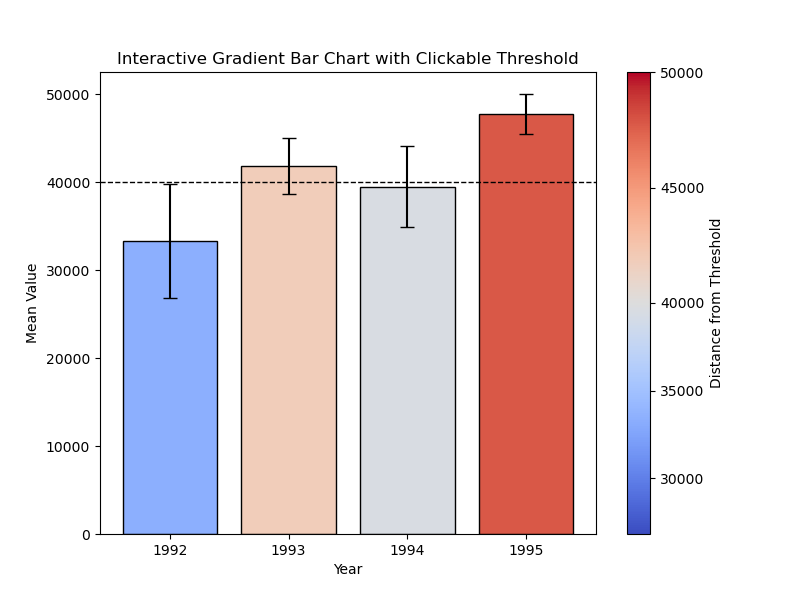

In [37]:
# Even Harder option

# Calculate the mean and 95% confidence interval
means = df.mean(axis=1)
errors = df.std(axis=1) / np.sqrt(df.shape[1]) * 1.96  # 95% confidence interval

# Initial threshold value
y_value = 40000

# Create the interactive plot
fig, ax = plt.subplots(figsize=(8, 6))

# Define colormap
cmap = cm.get_cmap('coolwarm')

# Create initial normalization
norm = TwoSlopeNorm(vmin=min(means - errors), vcenter=y_value, vmax=max(means + errors))

# Create bars with initial colors and black edges
bars = ax.bar(
    df.index, 
    means, 
    yerr=errors, 
    color=[cmap(norm(mean)) for mean in means], 
    edgecolor='black', 
    capsize=5
)

# Add a horizontal line for the initial threshold value
line = ax.axhline(y=y_value, color='black', linestyle='--', linewidth=1)

def onclick(event):
    """Update the threshold line and bar colors based on user click."""
    if event.ydata is None:  # Ignore clicks outside the plot area
        return

    # Update the threshold value
    y_value = event.ydata
    line.set_ydata(y_value)  # Update the horizontal line position

    # Update normalization based on the new threshold value
    norm = TwoSlopeNorm(vmin=min(means - errors), vcenter=y_value, vmax=max(means + errors))

    # Update bar colors with the new gradient
    for bar, mean in zip(bars, means):
        bar.set_color(cmap(norm(mean)))
        bar.set_edgecolor('black')  # Maintain black edges

    fig.canvas.draw()  # Redraw the figure

# Connect the click event to the onclick function
fig.canvas.mpl_connect('button_press_event', onclick)

# Set labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Mean Value')
ax.set_title('Interactive Gradient Bar Chart with Clickable Threshold')

# Ensure only the years are shown as x-axis ticks
ax.set_xticks(df.index)
ax.set_xticklabels(df.index)

# Add a colorbar to show the gradient scale
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label('Distance from Threshold')

# Display the plot
plt.show()


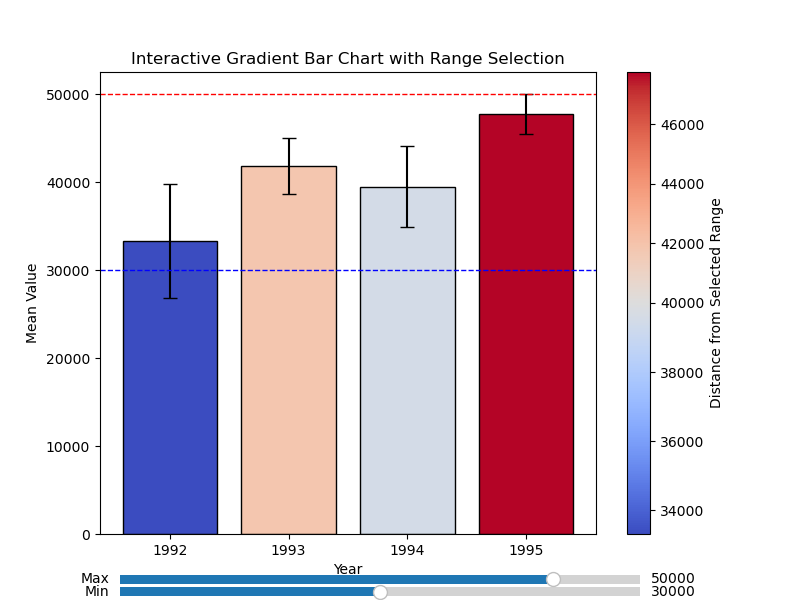

In [65]:
# Hardest Option
import matplotlib.widgets as widgets

# Calculate the mean and 95% confidence interval
means = df.mean(axis=1)
errors = df.std(axis=1) / np.sqrt(df.shape[1]) * 1.96  # 95% confidence interval

# Create the plot
fig, ax = plt.subplots(figsize=(8, 6))

# Define colormap
cmap = cm.get_cmap('coolwarm')

# Create initial normalization
norm = TwoSlopeNorm(vmin=means.min(), vcenter=40000, vmax=means.max())

# Create bars with initial colors and black edges
bars = ax.bar(
    df.index, 
    means, 
    yerr=errors, 
    color=[cmap(norm(mean)) for mean in means], 
    edgecolor='black', 
    capsize=5
)

# Add horizontal lines corresponding to slider values
line_min = ax.axhline(y=30000, color='blue', linestyle='--', linewidth=1, label='Min Threshold')
line_max = ax.axhline(y=50000, color='red', linestyle='--', linewidth=1, label='Max Threshold')

# Adjust slider positions to be lower
ax_slider1 = plt.axes([0.15, -0.001, 0.65, 0.03])  
ax_slider2 = plt.axes([0.15, 0.02, 0.65, 0.03])

# Create sliders for the min and max range selection
slider1 = widgets.Slider(ax_slider1, 'Min', 0, 60000, valinit=30000)
slider2 = widgets.Slider(ax_slider2, 'Max', 0, 60000, valinit=50000)

def update(val):
    min_val = slider1.val
    max_val = slider2.val
    
    # Updating position of horizontal lines
    line_min.set_ydata(min_val)
    line_max.set_ydata(max_val)

    # Recalculate normalization based on the new range
    norm = TwoSlopeNorm(vmin=min_val, vcenter=(min_val + max_val) / 2, vmax=max_val)

    # Update bar colors with the gradient
    for bar, mean in zip(bars, means):
        bar.set_color(cmap(norm(mean)))
        bar.set_edgecolor('black')  # Maintain black edges

    fig.canvas.draw_idle()  # Redraw the figure

# Connect sliders to the update function
slider1.on_changed(update)
slider2.on_changed(update)

# Set labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Mean Value')
ax.set_title('Interactive Gradient Bar Chart with Range Selection')

# Ensure only the years are shown as x-axis ticks
ax.set_xticks(df.index)
ax.set_xticklabels(df.index)

# Add a colorbar for reference
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label('Distance from Selected Range')

# Display the plot
plt.show()
